    The Notebook Title: StricklandMolly_ml.ipynb
    Author: Molly Strickland
[Clicklable link to github repository](https://github.com/MoStrick/datafun-07-ml-/tree/main)


    


## Part 1 - Chart a Straight Line


In [28]:
import matplotlib

### Convert temperature

In [29]:
c = lambda f: 5 / 9 * (f - 32)


### Create function to plot and dataframe properties (graph) to plot

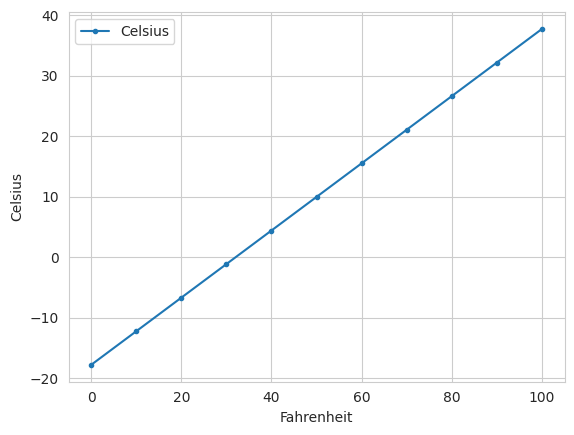

In [30]:
temps = [(f, c(f)) for f in range (0, 101,10)]
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit','Celsius'])
axes = temps_df.plot(x='Fahrenheit',y='Celsius',style='.-')
y_label = axes.set_ylabel('Celsius')

# Part 2

### 2.1: Data Acquisition: Obtain the Data

We obtained the January average high temperatures for New York City from 1895 through 2018 from NOAA’s “Climate at a Glance” time series at: https://www.ncdc.noaa.gov/cag
OR file in Unit 10: ave_hi_nyc_jan_1895-2018.csv

In [31]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### 2.2: Data Inspection
View the beginning and end of your data

In [32]:
nyc_df.head()
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### 2.3: Data Cleaning

Rename Column

Check Data Type

Remove 01 from the dates to create just columns
    floor division performs integer division on every element of the series


In [33]:


nyc_df.columns = ['Date','Temperature','Anomaly']
nyc_df.head(3)

nyc_df.Date.dtype

nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### 2.4: Descriptive statistis for the data set
Set the precision option correctly:   pd.set_option('display.precision', 2)


In [34]:
pd.set_option('display.precision',2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### 2.5: Build the Model: Creating the linear regression equation (Scipy)

In [35]:
from scipy import stats
linear_regression=stats.linregress(x=nyc_df.Date,y=nyc_df.Temperature)

round(linear_regression.slope,5)

0.01477

In [36]:
round(linear_regression.intercept,5)

8.69499

### Interpreting the linear regression equation
The object returned by linregress contains the regression line's slope and y-intercept:


### 2.6: Predict future values
To predict temperature in 2019 and 1890, and 2024

In [37]:
round(linear_regression.slope*2019+linear_regression.intercept,4)

38.5184

In [38]:
round(linear_regression.slope*1890+linear_regression.intercept,4)

36.6129

In [39]:
round(linear_regression.slope*2024+linear_regression.intercept,4)

38.5922

# Interpretation

### 2.7: Visualizations- Create the scatterplot
Close the matplotlib window if you have not done so already, or it will use the existing window that already contains the graph


(20.0, 55.0)

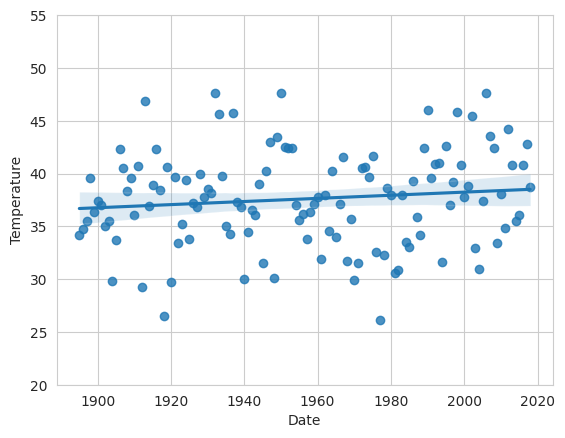

In [40]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date,y=nyc_df.Temperature)

axes.set_ylim(20,55)

# Observations




# Part 3

In [41]:
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Load data into dataframe


In [42]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

nyc.columns = ['Date','Temperature','Anomaly']

nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Splitting the Data for training and testing


In [43]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values,random_state=11)


In [44]:
X_train.shape


(93, 1)

In [45]:
X_test.shape

(31, 1)

### Training the Model


In [46]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [47]:
linear_regression.coef_


array([0.01939167])

In [48]:
linear_regression.intercept_


-0.30779820252656265

### Testing the Model

In [49]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]): print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Estimating Past and Predicting Future Temps


In [50]:

predict = (lambda x: linear_regression.coef_*x+linear_regression.intercept_)

In [51]:
predict(2019)

array([38.84399018])

In [52]:
predict(1890)

array([36.34246432])

In [53]:
predict(2024)

array([38.94094855])

### Visualizing the Data Set


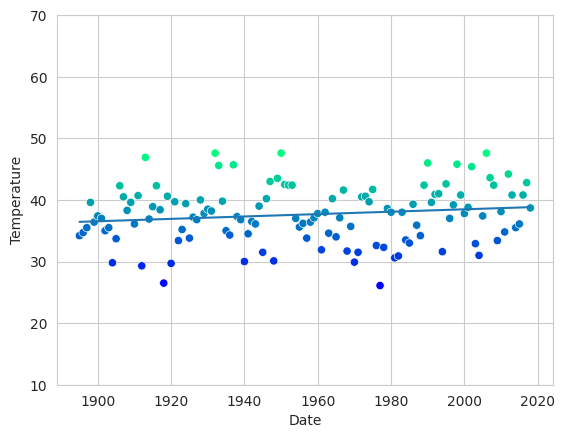

In [54]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10,70)

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

line = plt.plot(x,y)


# Part 4

## Comparing the 2 methods
### Ch 10
Easier to make errors
### Ch 15
Many more dependencies
easier, almost. more dependencies to make codes more efficient
Better Visual Displays: more appealing
Data Type seemed to be arrays and not integers

### Data Insights:
The data includes features like time, demand, and introduction of a new chip.
It performs exploratory data analysis with visualizations to understand the data distribution and relationships.
Data is split into training and test sets.

### Code Insights:
Various regression models are implemented, such as Linear Regression.
The notebook uses libraries like pandas, numpy, matplotlib, and scikit-learn.
Performance metrics like Mean Squared Error (MSE) and R-squared are calculated to evaluate model performance.


# Part 5 bonus
## Textbook Exercise 15.5 
### 15.5 Case Study: Multiple Linear Regression with the California Housing Dataset


## 15.5.1 Loading the Dataset
### Loading the Data

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

### Displaying the Dataset’s Description

In [ ]:
print(california.DESCR)

california.data.shape

california.target.shape

california.feature_names

## 15.5.2 Exploring the Data with Pandas

In [ ]:
import pandas as pd

pd.set_option('precision', 4)

pd.set_option('max_columns', 9)

pd.set_option('display.width', None)

california_df = pd.DataFrame(california.data, 
                              columns=california.feature_names)
 
california_df['MedHouseValue'] = pd.Series(california.target)

california_df.head()

california_df.describe()

## 15.5.3 Visualizing the Features

In [ ]:
sample_df = california_df.sample(frac=0.1, random_state=17)

import matplotlib.pyplot as plt

import seaborn as sns

sns.set(font_scale=2)

sns.set_style('whitegrid')                                    

for feature in california.feature_names:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=sample_df, x=feature, 
                     y='MedHouseValue', hue='MedHouseValue', 
                     palette='cool', legend=False)

## 15.5.4 Splitting the Data for Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     california.data, california.target, random_state=11)

X_train.shape

X_test.shape

## 15.5.5 Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(california.feature_names):
     print(f'{name:>10}: {linear_regression.coef_[i]}')

linear_regression.intercept_

## 15.5.6 Testing the Model

In [ ]:
predicted = linear_regression.predict(X_test)

expected = y_test

predicted[:5]

expected[:5]

## 15.5.7 Visualizing the Expected vs. Predicted Prices

In [ ]:
df = pd.DataFrame()

df['Expected'] = pd.Series(expected)

df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
     hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

## 15.5.8 Regression Model Metrics

In [ ]:
from sklearn import metrics

metrics.r2_score(expected, predicted)

metrics.mean_squared_error(expected, predicted)

## 15.5.9 Choosing the Best Model

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=california.data, y=california.target, cv=kfold,
         scoring='r2')
     print(f'{estimator_name:>16}: ' + 
           f'mean of r2 scores={scores.mean():.3f}')